# Car Price Prediction
## Tamim Hussein
## Code Alpha 
### Data Science Internship

In [312]:
# Loading dataset

import pandas as pd

df = pd.read_csv("car_data.csv")

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Data Processing

In [314]:
# checking for null values

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [315]:
# checking for extra spaces within the records
# Generate unique values for each column
unique_values = df.apply(lambda x: x.unique())

# Display the unique values
print(unique_values)

Car_Name         [ritz, sx4, ciaz, wagon r, swift, vitara brezz...
Year             [2014, 2013, 2017, 2011, 2018, 2015, 2016, 200...
Selling_Price    [3.35, 4.75, 7.25, 2.85, 4.6, 9.25, 6.75, 6.5,...
Present_Price    [5.59, 9.54, 9.85, 4.15, 6.87, 9.83, 8.12, 8.6...
Driven_kms       [27000, 43000, 6900, 5200, 42450, 2071, 18796,...
Fuel_Type                                    [Petrol, Diesel, CNG]
Selling_type                                  [Dealer, Individual]
Transmission                                   [Manual, Automatic]
Owner                                                    [0, 1, 3]
dtype: object


In [316]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [318]:
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns")

This dataset has 301 rows and 9 columns


### Data Visualization

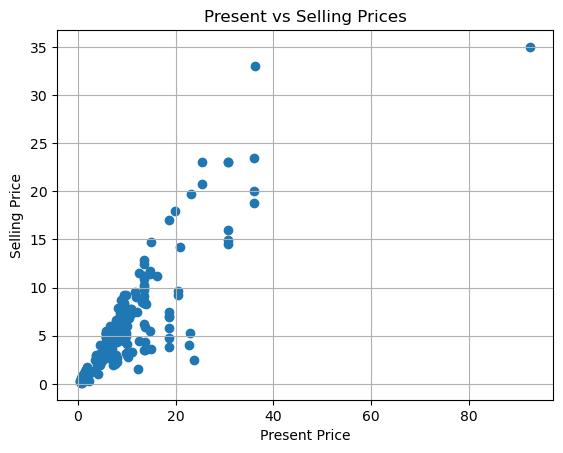

In [320]:
import matplotlib.pyplot as plt

plt.scatter(df["Present_Price"],df["Selling_Price"])
plt.xlabel("Present Price")
plt.ylabel("Selling Price")
plt.title("Present vs Selling Prices")
plt.grid()
plt.show()

In [321]:
# Drop the outlier showing great difference between present and selling price
# Iterate over the range of the length of the "Car_Name" column in the DataFrame
for i in range(len(df["Car_Name"])):
    # Check if the "Present_Price" at index i is greater than 80
    if df["Present_Price"].get(i) > 80:
        # Print the car name, year, transmission type, and owner for cars with a price greater than 80
        print(df["Car_Name"].get(i), df["Year"].get(i), df["Transmission"].get(i), df["Owner"].get(i))
        # Drop the record at index i from the DataFrame
        df = df.drop(index=i)


land cruiser 2010 Manual 0


### Linear Regression Model

In [323]:
# Drop the Car_Name column as it will not be considered a feature
df = df.drop(["Car_Name"], axis = 1)

In [324]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
# Convert non-numerical columns to numerical
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,1,0
297,2015,4.00,5.90,60000,2,0,1,0
298,2009,3.35,11.00,87934,2,0,1,0
299,2017,11.50,12.50,9000,1,0,1,0


In [325]:
# Separating features and prices

data = df.values

# Define features and Price
features = df.drop(['Selling_Price'], axis=1)  # Drop Selling_Price from features
price = df['Selling_Price']  # Target variable

print(features.head())  # To verify the features
print(price.head())  # To verify the Prices

   Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0  2014           5.59       27000          2             0             1   
1  2013           9.54       43000          1             0             1   
2  2017           9.85        6900          2             0             1   
3  2011           4.15        5200          2             0             1   
4  2014           6.87       42450          1             0             1   

   Owner  
0      0  
1      0  
2      0  
3      0  
4      0  
0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


In [326]:
# Split the dataset into training and test data

from sklearn.model_selection import train_test_split

features_train, features_test, price_train, price_test = train_test_split(features,price, test_size = 0.3, random_state = 42)

features_train.values[0]

array([2.015e+03, 3.200e-01, 3.500e+04, 2.000e+00, 1.000e+00, 1.000e+00,
       0.000e+00])

In [327]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(features_train, price_train)

LinearRegression()

In [328]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
price_pred = model.predict(features_test)

# Evaluate the model
mse = mean_squared_error(price_test, price_pred)
r2 = r2_score(price_test, price_pred)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.9545238292505935


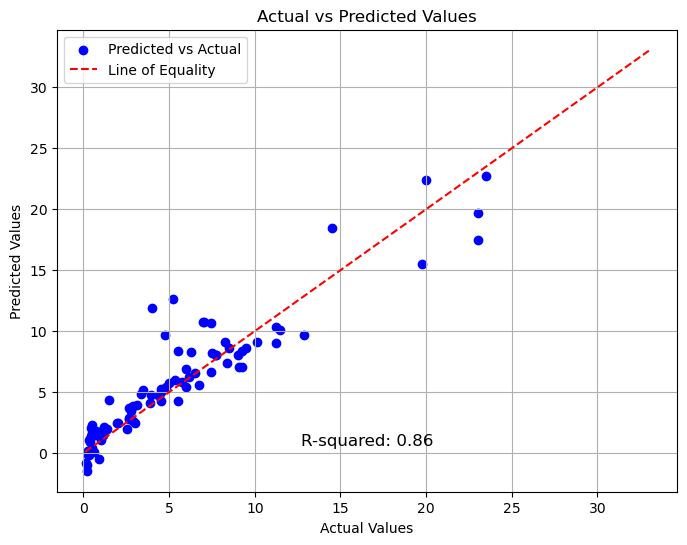

In [329]:
# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(price_test, price_pred, color='blue', label='Predicted vs Actual')
plt.plot([price.min(), price.max()], [price.min(), price.max()], color='red', linestyle='--', label='Line of Equality')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.text(0.5, 0.1, f'R-squared: {r2:.2f}', fontsize=12, ha='center', transform=plt.gca().transAxes)
plt.grid()
plt.show()

In [330]:
# Access coefficients after fitting
coefficients = model.coef_
intercept = model.intercept_

map = {}
features = features_train.columns

for i in range(len(features)):
    map[features[i]] = f'{coefficients[i]:.6f}'
    
# Interpret the coefficients
print("Intercept:", intercept)
print("Coefficients:", map)

Intercept: -680.3940175816424
Coefficients: {'Year': '0.339261', 'Present_Price': '0.568433', 'Driven_kms': '-0.000005', 'Fuel_Type': '-0.740805', 'Selling_type': '-0.355708', 'Transmission': '-0.664112', 'Owner': '-1.258130'}


### Random Forest Model

In [332]:
from sklearn.ensemble import RandomForestRegressor

# Create Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state = 42)

# Fitting model
rf_model.fit(features_train, price_train)

RandomForestRegressor(random_state=42)

In [333]:
# Make predictions
rf_price_predict = rf_model.predict(features_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(price_test, rf_price_predict)
mse = mean_squared_error(price_test, rf_price_predict)
r2 = r2_score(price_test, rf_price_predict)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 0.6722766666666666
Mean Squared Error: 1.0925036696666663


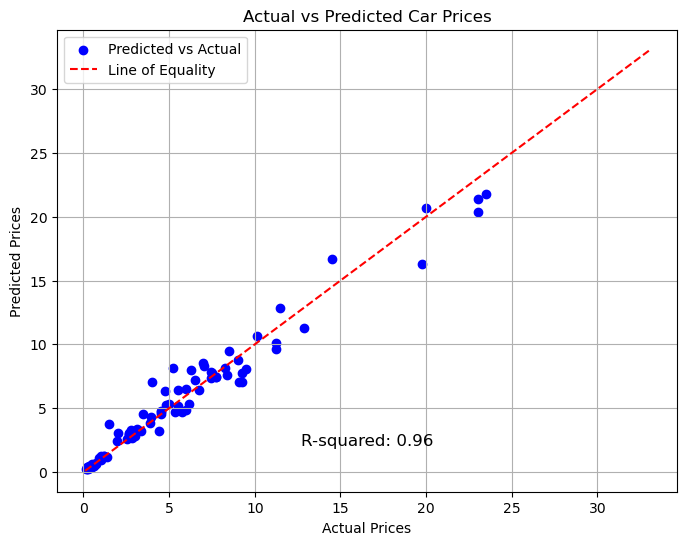

In [334]:
# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(price_test, rf_price_predict, color='blue', label='Predicted vs Actual')
plt.plot([price.min(), price.max()], [price.min(), price.max()], color='red', linestyle='--', label='Line of Equality')
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.text(0.5, 0.1, f'R-squared: {r2:.2f}', fontsize=12, ha='center', transform=plt.gca().transAxes)
plt.grid()
plt.show()